In [5]:
require(tidyverse)
require(party)
require(mgcv)
require(lattice)
require(languageR)
require(repr)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: party

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary


Loading required package: mgcv

Loading required package: nlme


Attaching pac

## Naming data

In [6]:
naming = read.csv("../data/naming_sense_indices.csv")

In [7]:
dim(naming)

[1] 1398   30

In [8]:
names(naming)

[1] "Character"                 "zhuyin"                   
 [3] "Phonetic.Component"        "Semantic.Component"       
 [5] "Frequency"                 "Consistency..type."       
 [7] "Consistency..token."       "Regularity"               
 [9] "Homophone.Density"         "Phonetic.Combinability"   
[11] "Semantic.Combinability"    "Stroke"                   
[13] "Familiarity"               "Semantic.Ambiguity.Rating"
[15] "NC1"                       "NC2"                      
[17] "Naming.Acc"                "RT"                       
[19] "word"                      "n_sense"                  
[21] "log_n_sense"               "n_tagged"                 
[23] "sfreq_sum"                 "sfreq_max"                
[25] "sfreq_std"                 "sfreq_ent"                
[27] "sfreq_ent_norm"            "vol_raw"                  
[29] "vol_cen"                   "vol_cennorm"

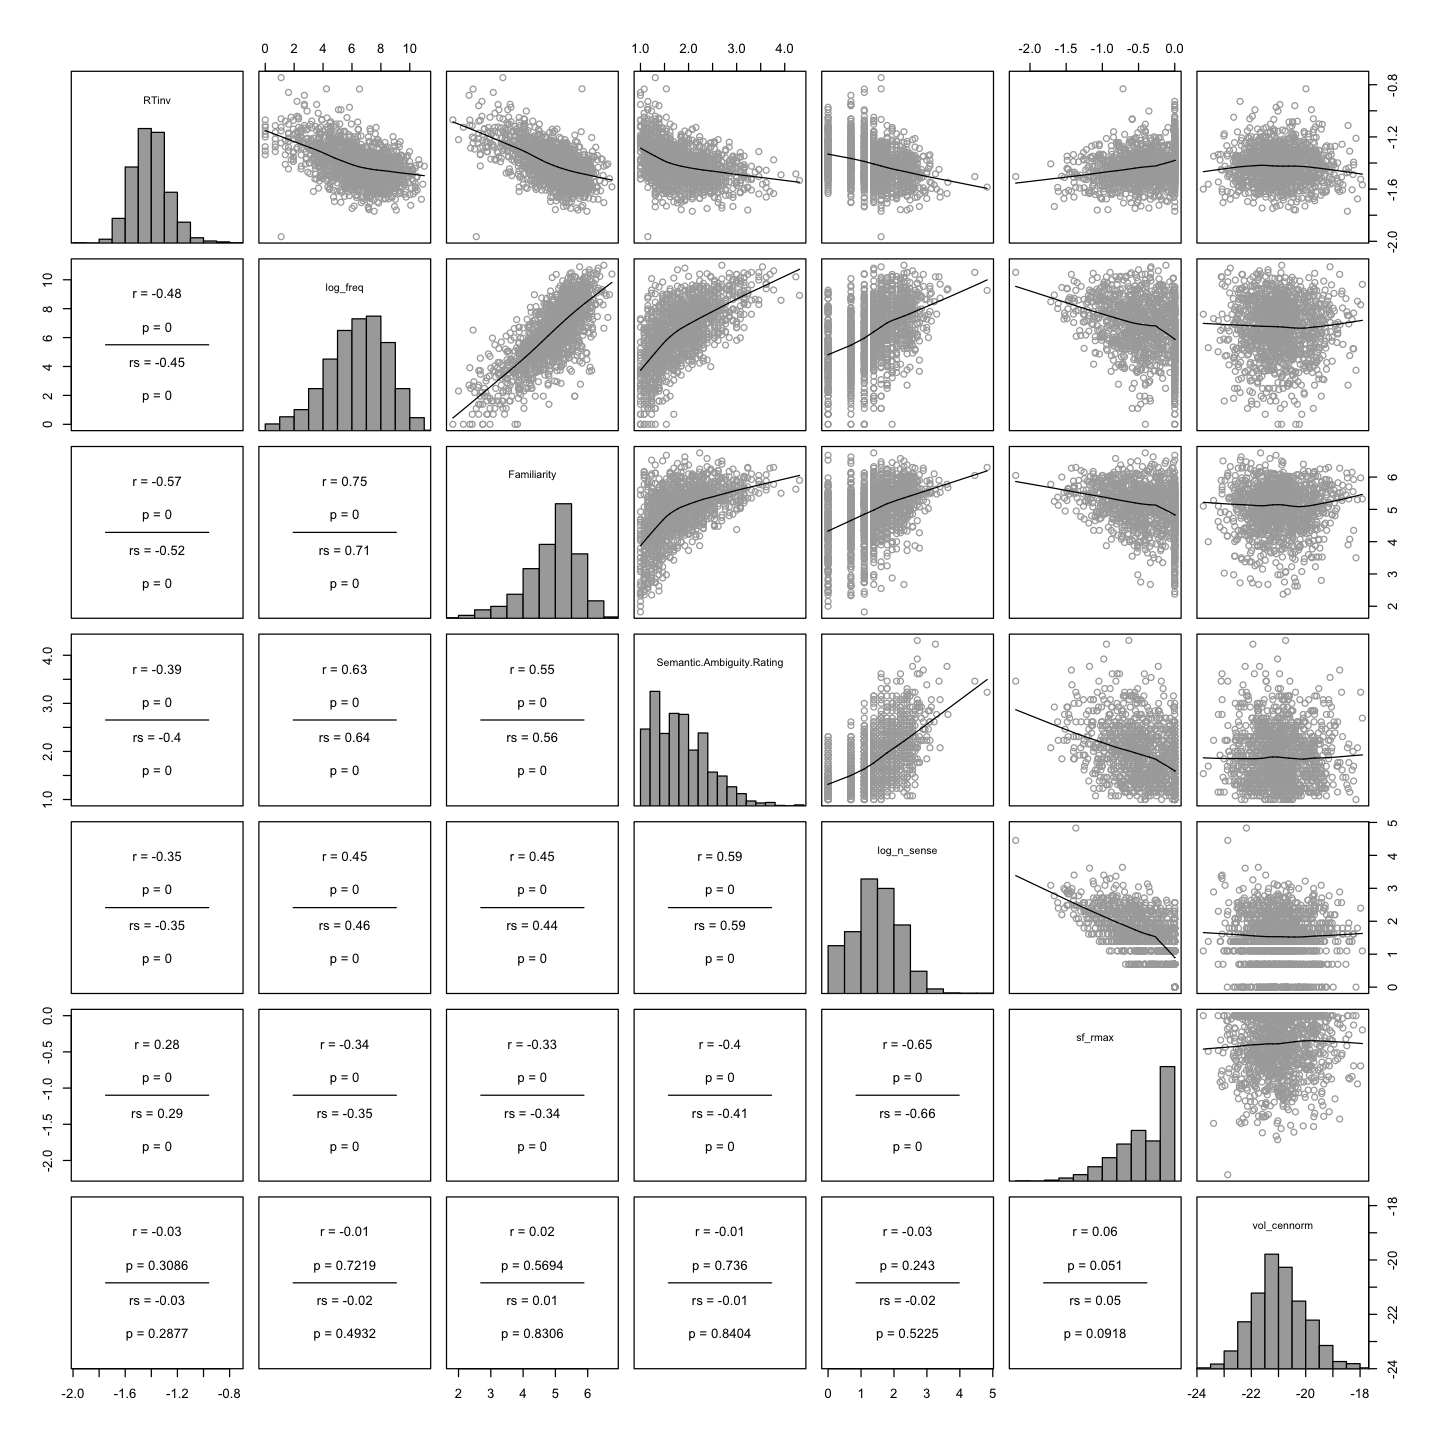

In [9]:
naming$log_freq = log(naming$Frequency)
naming$RTinv = -1000/naming$RT
naming$sf_rmax = log((naming$sfreq_max+1) / (naming$sfreq_sum+1))
naming_variables = c("RTinv", "log_freq",
                       "Familiarity", "Semantic.Ambiguity.Rating",
                       "log_n_sense", "sf_rmax", "vol_cennorm")
options(repr.plot.width=12, repr.plot.height=12)

pairscor.fnc(naming[,c(naming_variables)])

In [10]:
naming.RT.cf <- cforest(RTinv ~ ., data=naming[,naming_variables])

In [11]:
naming.RT.varimp = varimp(naming.RT.cf)

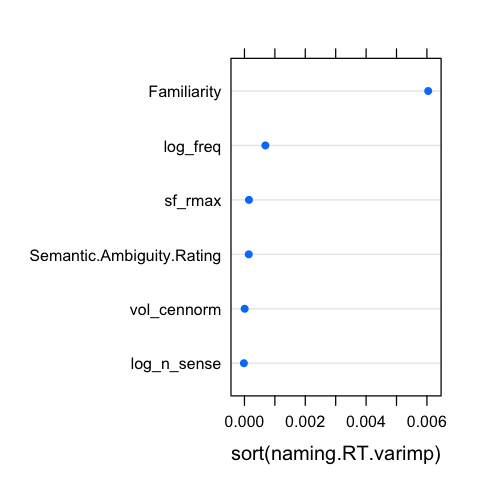

In [12]:
options(repr.plot.width=4, repr.plot.height=4)
dotplot(sort(naming.RT.varimp), main=list(cex=2))

In [13]:
naming.m.0 = bam(RTinv~s(log_freq)+s(log_n_sense)+s(sf_rmax)+s(vol_cennorm), data=naming)

In [15]:
summary(naming.m.0)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(log_n_sense) + s(sf_rmax) + s(vol_cennorm)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.420015   0.003274  -433.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                 edf Ref.df      F p-value    
s(log_freq)    3.899  4.879 41.344 < 2e-16 ***
s(log_n_sense) 1.000  1.000  9.079 0.00264 ** 
s(sf_rmax)     1.000  1.000  6.963 0.00843 ** 
s(vol_cennorm) 2.168  2.769  1.482 0.19525    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.234   Deviance explained = 23.9%
fREML = -888.65  Scale est. = 0.013044  n = 1217

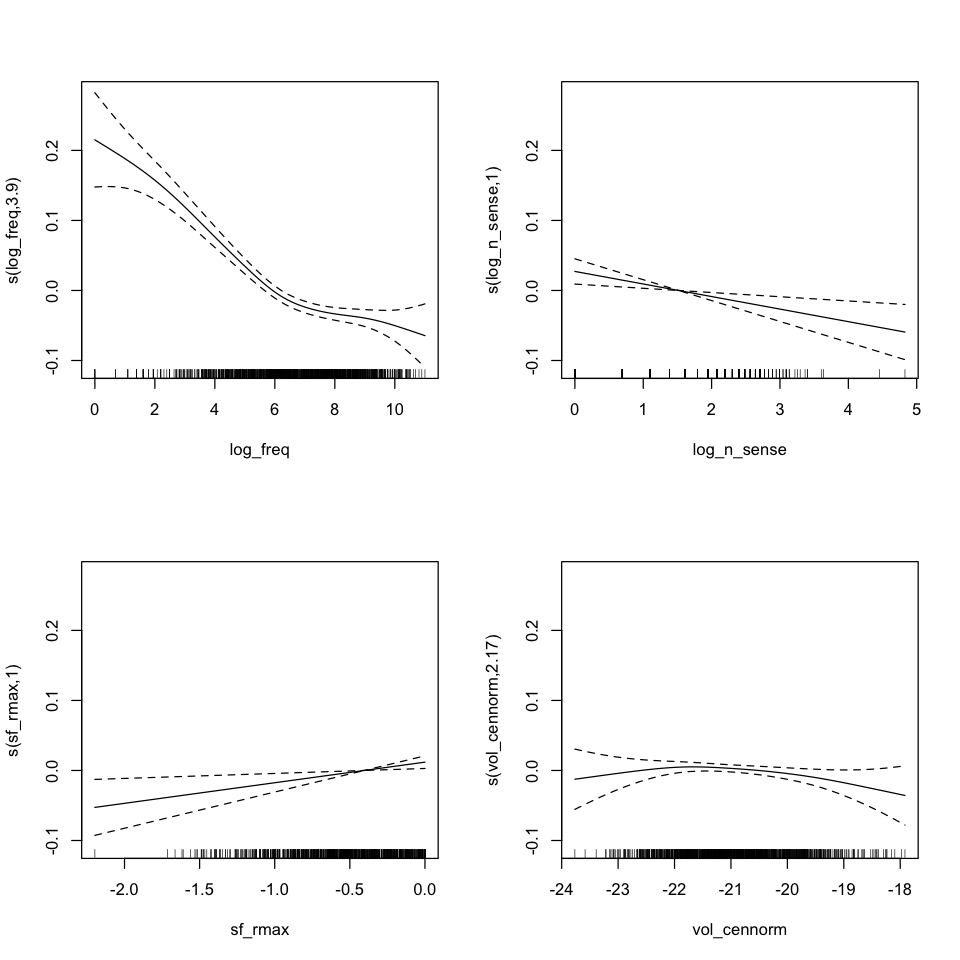

In [18]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
plot(naming.m.0, select=1)
plot(naming.m.0, select=2)
plot(naming.m.0, select=3)
plot(naming.m.0, select=4)

In [19]:
naming.m.1 = bam(RTinv~s(log_freq)+te(log_n_sense, sf_rmax), data=naming)
summary(naming.m.1)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + te(log_n_sense, sf_rmax)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.42002    0.00328  -432.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                          edf Ref.df     F p-value    
s(log_freq)             3.905  4.888 41.40  <2e-16 ***
te(log_n_sense,sf_rmax) 3.000  3.000 12.96  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.231   Deviance explained = 23.5%
fREML = -896.21  Scale est. = 0.013094  n = 1217

In [24]:
c(AIC(naming.m.0), AIC(naming.m.1))

[1] -1813.979 -1812.055

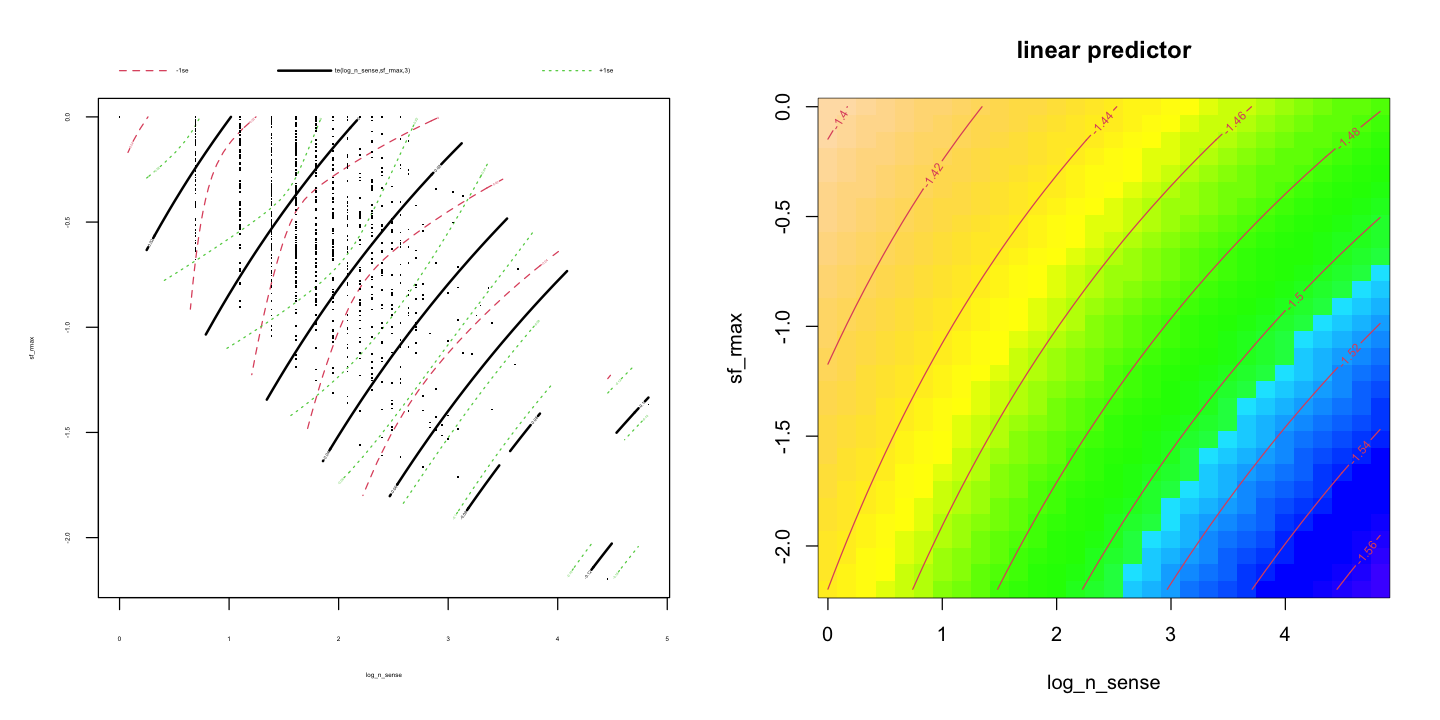

In [20]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))
plot(naming.m.1, select=2)
vis.gam(naming.m.1, view=c("log_n_sense", "sf_rmax"), plot.type="contour", color="topo")

In [21]:
naming.m.2 = bam(RTinv~s(log_freq)+te(log_n_sense, vol_cennorm), data=naming)
summary(naming.m.2)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + te(log_n_sense, vol_cennorm)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.42002    0.00328  -432.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                              edf Ref.df      F p-value    
s(log_freq)                 3.876  4.852 43.229  <2e-16 ***
te(log_n_sense,vol_cennorm) 5.179  6.542  5.835   3e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.231   Deviance explained = 23.7%
fREML = -894.47  Scale est. = 0.013092  n = 1217

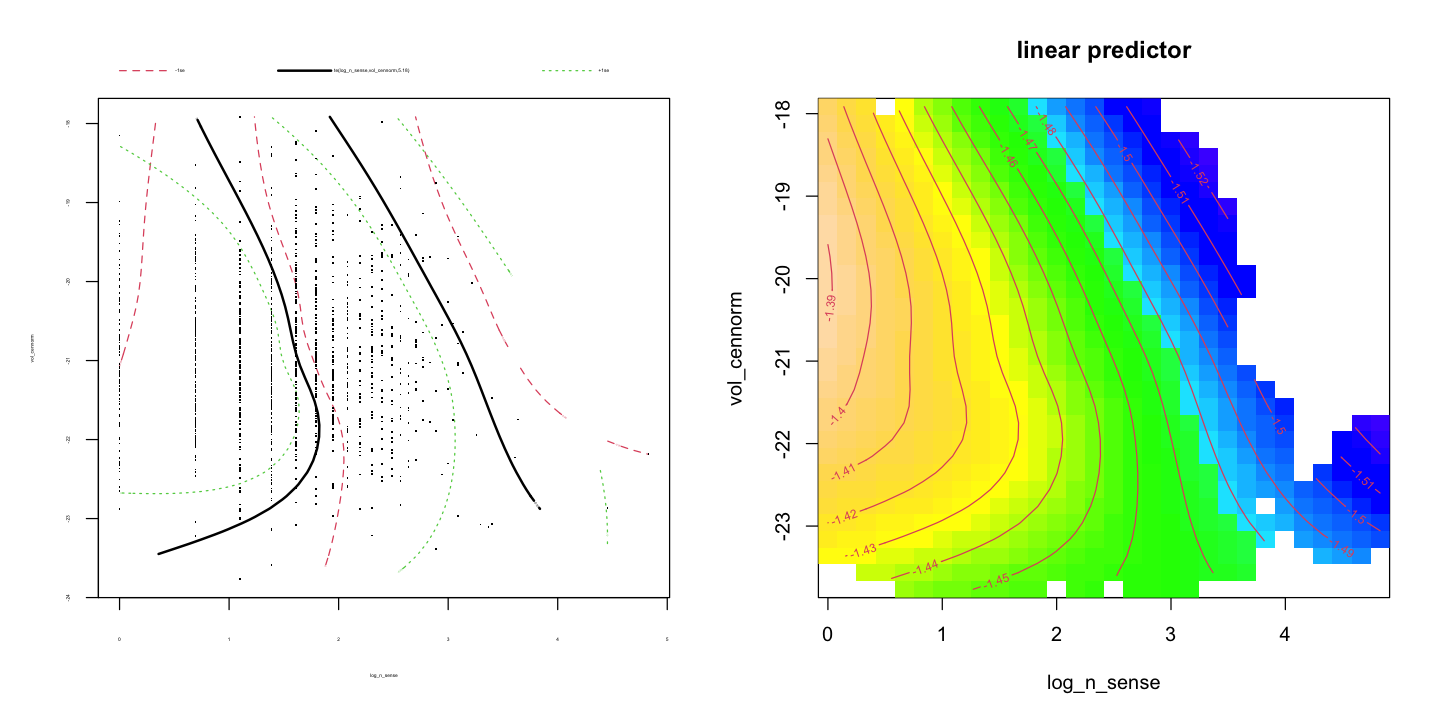

In [28]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))
plot(naming.m.2, select=2)
vis.gam(naming.m.2, view=c("log_n_sense", "vol_cennorm"), plot.type="contour", color="topo", too.far=.1)

## CLP data

In [30]:
clp = read.csv("../data/CLP_sense_indices.csv")

In [31]:
dim(clp)

[1] 4128   40

In [32]:
names(clp)

[1] "Word_Trad"           "Word_Sim"            "Ntrials"            
 [4] "Acc"                 "RT"                  "RT.SE"              
 [7] "RT.SD"               "zRT"                 "Stroke.1"           
[10] "Stroke.2"            "C.B.Subtitle.raw.C1" "C.B.Subtitle.raw.C2"
[13] "C.B.Subtitle.CD.C1"  "C.B.Subtitle.CD.C2"  "SS.M.C1"            
[16] "SS.M.C2"             "Da.Modern.C1"        "Da.Modern.C2"       
[19] "Google.freq.C1"      "Google.freq.C2"      "C.B.Subtitle.raw.W" 
[22] "C.B.Subtitle.CD.W"   "SS.M.W"              "Da.News.W"          
[25] "Da.Fiction.W"        "Google.freq.W"       "ST.C1"              
[28] "ST.C2"               "word"                "n_sense"            
[31] "log_n_sense"         "n_tagged"            "sfreq_sum"          
[34] "sfreq_max"           "sfreq_std"           "sfreq_ent"          
[37] "sfreq_ent_norm"      "vol_raw"             "vol_cen"            
[40] "vol_cennorm"

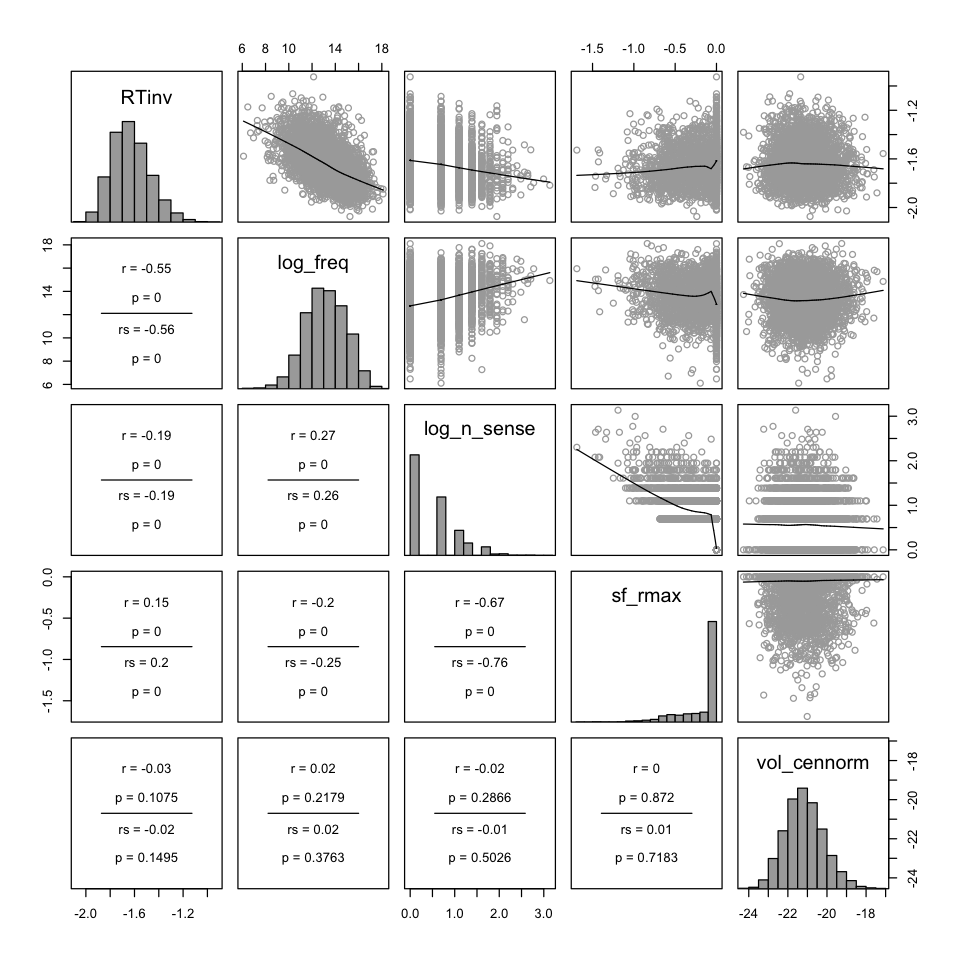

In [33]:
clp$log_freq = log(clp$SS.M.W)
clp$RTinv = -1000/clp$RT
clp$sf_rmax = log((clp$sfreq_max+1) / (clp$sfreq_sum+1))
clp_variables = c("RTinv", "log_freq",
                       "log_n_sense", "sf_rmax", "vol_cennorm")
options(repr.plot.width=8, repr.plot.height=8)

pairscor.fnc(clp[,c(clp_variables)])

In [34]:
clp.m.0 = bam(RTinv~s(log_freq)+s(log_n_sense)+s(sf_rmax)+s(vol_cennorm), data=clp)

In [35]:
summary(clp.m.0)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(log_n_sense) + s(sf_rmax) + s(vol_cennorm)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.633317   0.002283  -715.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                 edf Ref.df       F p-value    
s(log_freq)    4.071  5.127 239.879  <2e-16 ***
s(log_n_sense) 1.823  2.248   5.803  0.0026 ** 
s(sf_rmax)     1.522  1.877   0.248  0.7999    
s(vol_cennorm) 1.000  1.000   1.609  0.2048    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.303   Deviance explained = 30.4%
fREML = -1999.7  Scale est. = 0.017498  n = 3356

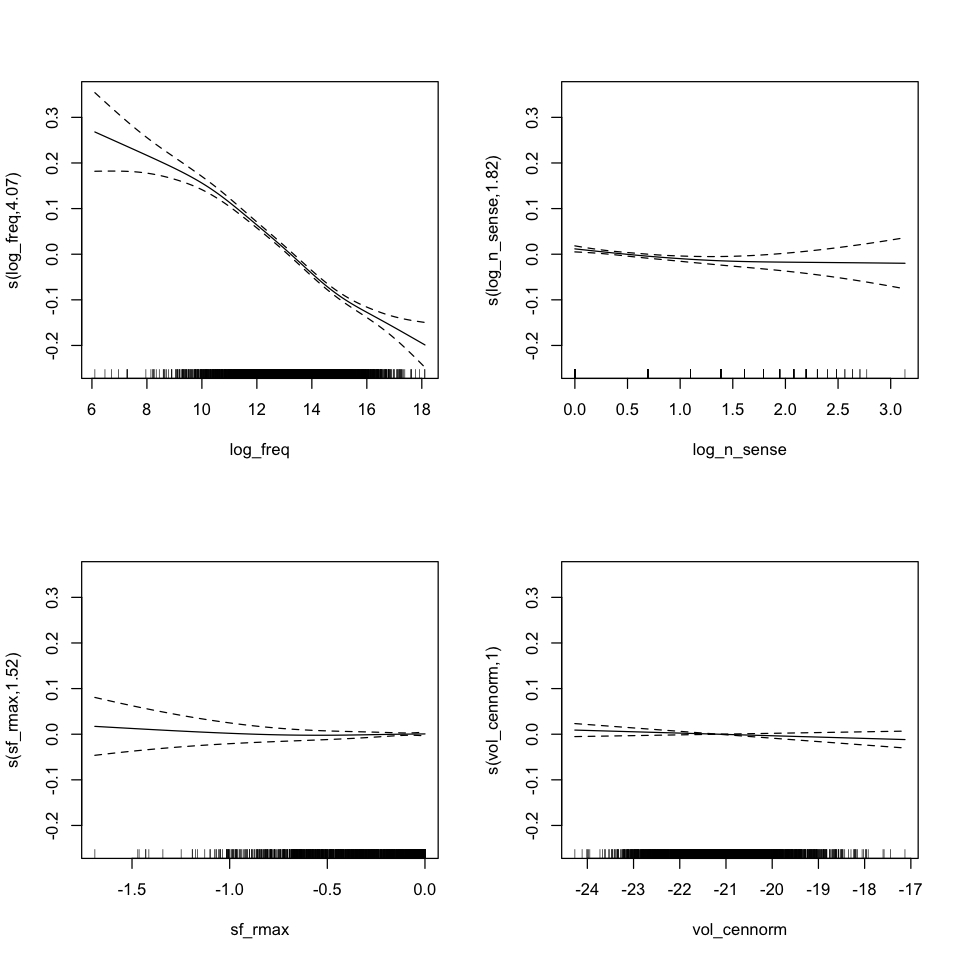

In [36]:
par(mfrow=c(2,2))
plot(clp.m.0, select=1)
plot(clp.m.0, select=2)
plot(clp.m.0, select=3)
plot(clp.m.0, select=4)

In [44]:
clp.m.0.0 = bam(RTinv~s(log_freq) + s(log_n_sense), data=clp)
summary(clp.m.0.0)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(log_n_sense)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.632125   0.002069  -788.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                 edf Ref.df       F p-value    
s(log_freq)    4.458  5.569 285.173 < 2e-16 ***
s(log_n_sense) 1.000  1.000   9.897 0.00167 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.308   Deviance explained = 30.9%
fREML = -2445.2  Scale est. = 0.017286  n = 4038

In [39]:
clp.m.0.1 = bam(RTinv~te(log_freq, vol_cennorm)+s(log_n_sense)+s(sf_rmax), data=clp)

In [40]:
summary(clp.m.0.1)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ te(log_freq, vol_cennorm) + s(log_n_sense) + s(sf_rmax)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.633317   0.002284  -715.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                           edf Ref.df       F p-value    
te(log_freq,vol_cennorm) 6.200  7.241 170.255  <2e-16 ***
s(log_n_sense)           1.837  2.266   5.829  0.0025 ** 
s(sf_rmax)               1.518  1.871   0.252  0.7980    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.302   Deviance explained = 30.4%
fREML = -2003.6  Scale est. = 0.017508  n = 3356

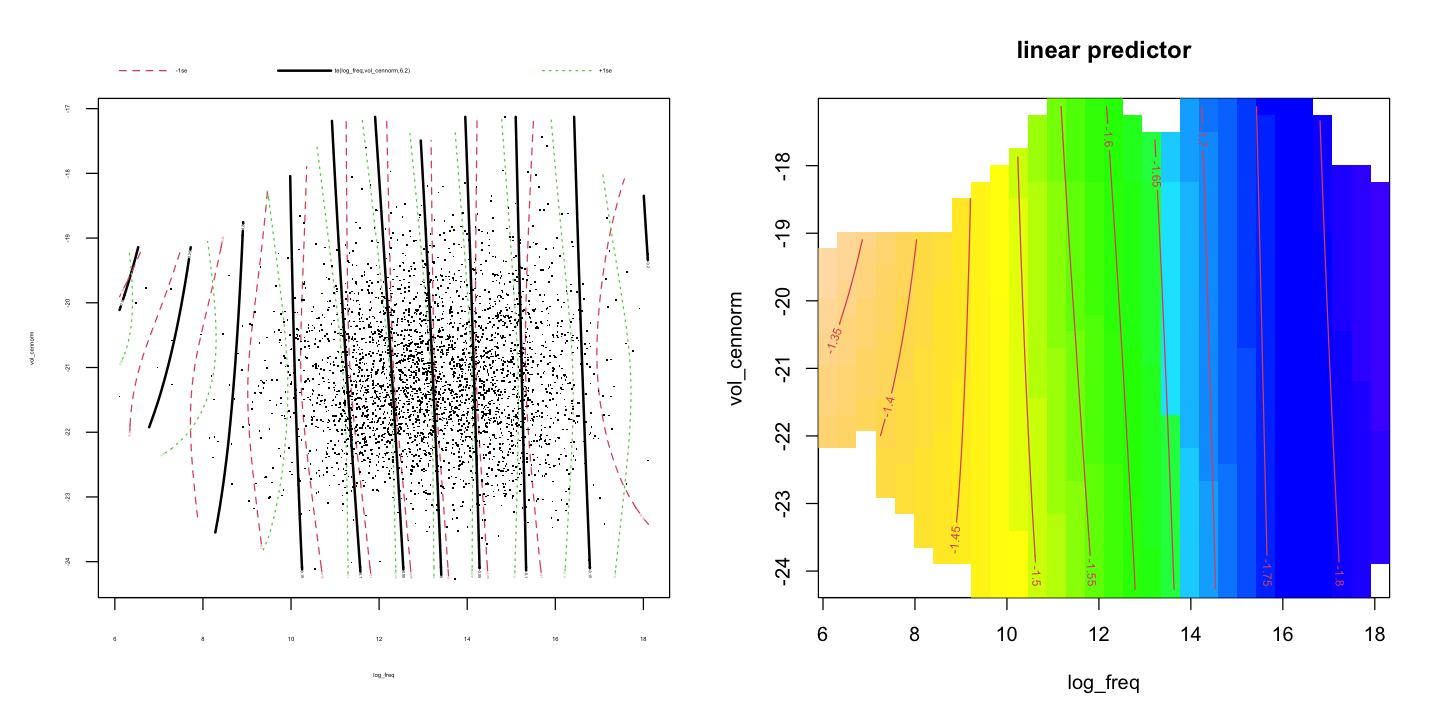

In [41]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))
plot(clp.m.0.1, select=1)
vis.gam(clp.m.0.1, view=c("log_freq", "vol_cennorm"), plot.type="contour", color="topo", too.far=0.1)

In [45]:
clp.m.0.2 = bam(RTinv~te(log_freq, log_n_sense), data=clp)
summary(clp.m.0.2)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ te(log_freq, log_n_sense)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.632125   0.002068  -789.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                          edf Ref.df     F p-value    
te(log_freq,log_n_sense) 7.61   9.21 195.7  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.308   Deviance explained =   31%
fREML = -2450.7  Scale est. = 0.017268  n = 4038

In [48]:
c(AIC(clp.m.0.0), AIC(clp.m.0.2))

[1] -4916.644 -4917.868

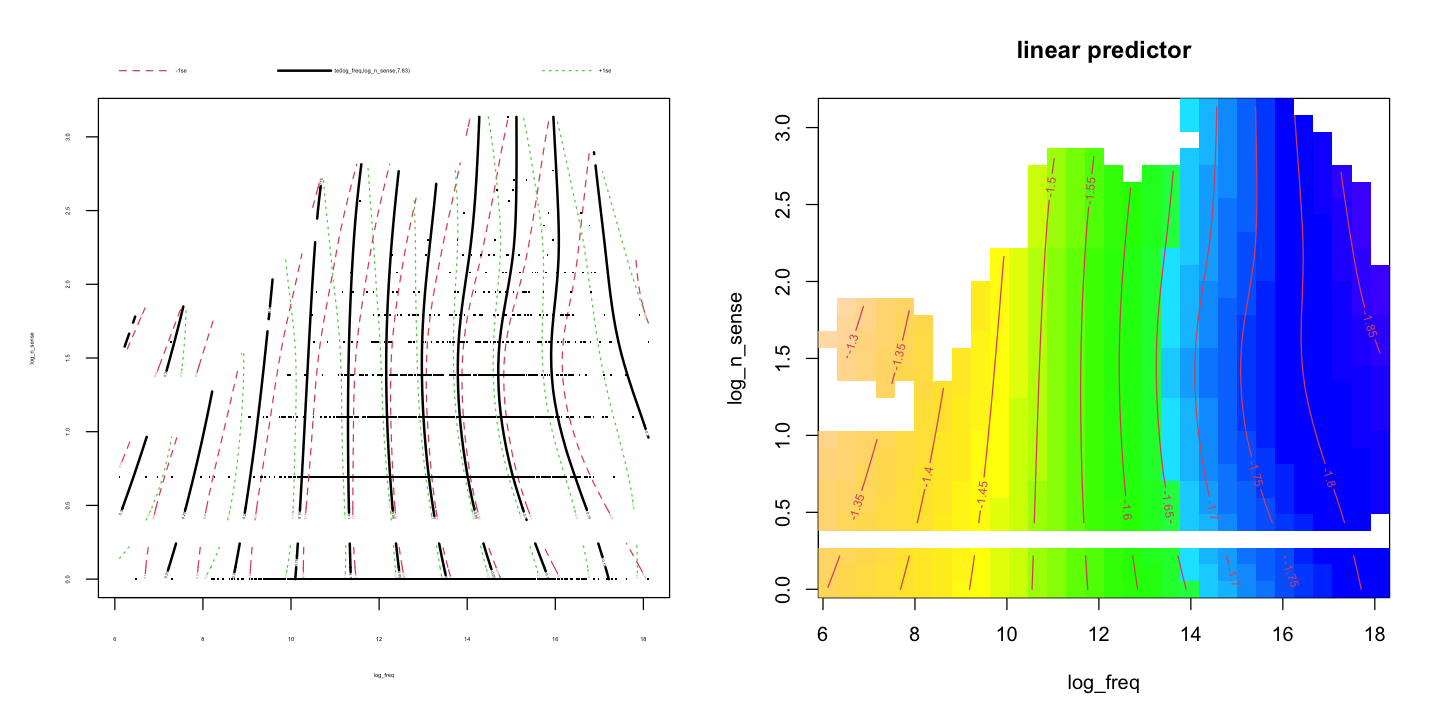

In [43]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))
plot(clp.m.0.2, select=1)
vis.gam(clp.m.0.2, view=c("log_freq", "log_n_sense"), plot.type="contour", color="topo", too.far=0.1)

In [37]:
clp.m.1 = bam(RTinv~s(log_freq)+te(log_n_sense, sf_rmax), data=clp)
summary(clp.m.1)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + te(log_n_sense, sf_rmax)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.633317   0.002283  -715.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                          edf Ref.df       F p-value    
s(log_freq)             4.065  5.121 241.084 < 2e-16 ***
te(log_n_sense,sf_rmax) 3.000  3.000   8.578 1.2e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.303   Deviance explained = 30.4%
fREML =  -2010  Scale est. = 0.017496  n = 3356

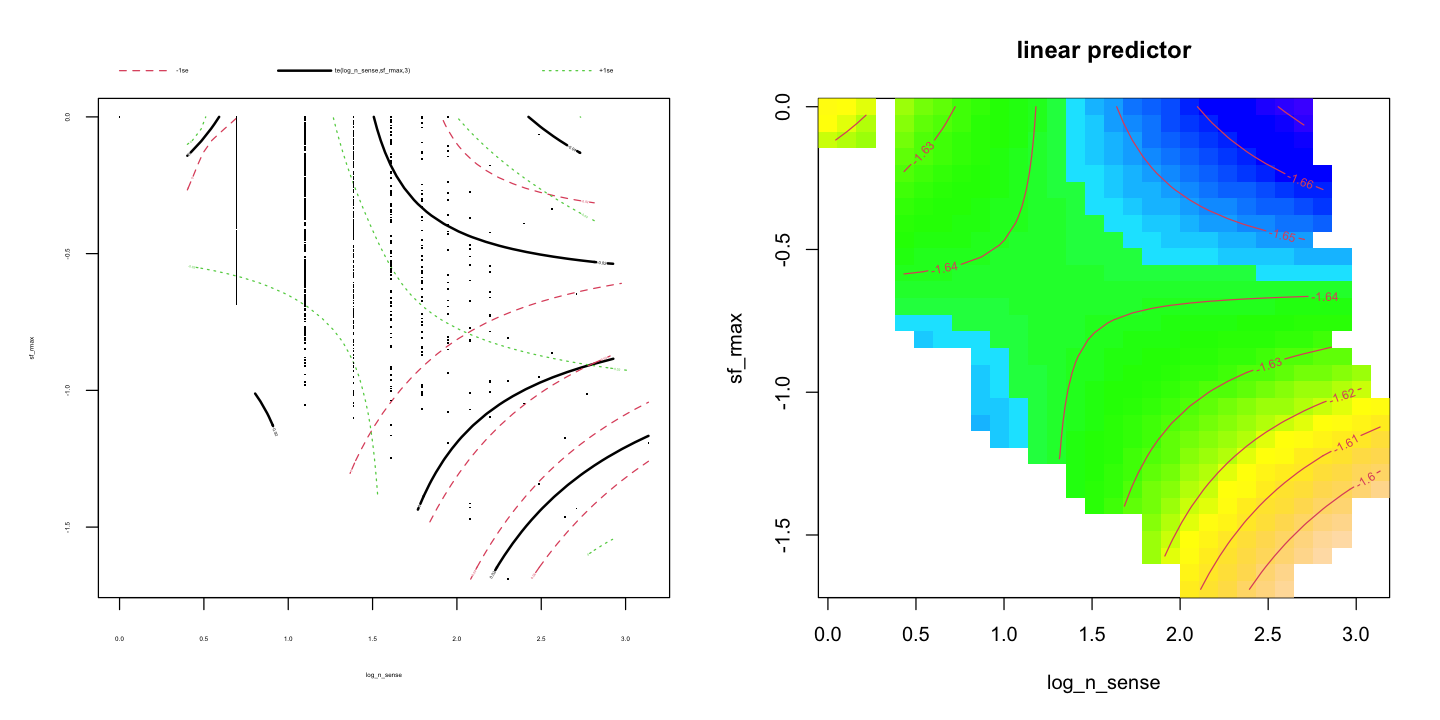

In [38]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))
plot(clp.m.1, select=2)
vis.gam(clp.m.1, view=c("log_n_sense", "sf_rmax"), plot.type="contour", color="topo", too.far=0.1)

In [17]:
clp.m.2 = bam(RTinv~s(log_freq)+te(log_n_sense, vol_cennorm), data=clp)
summary(clp.m.2)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + te(log_n_sense, vol_cennorm)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.633317   0.002283  -715.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                              edf Ref.df       F  p-value    
s(log_freq)                 4.066  5.122 240.323  < 2e-16 ***
te(log_n_sense,vol_cennorm) 3.992  4.462   5.684 9.98e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.303   Deviance explained = 30.4%
fREML = -2008.3  Scale est. = 0.017498  n = 3356

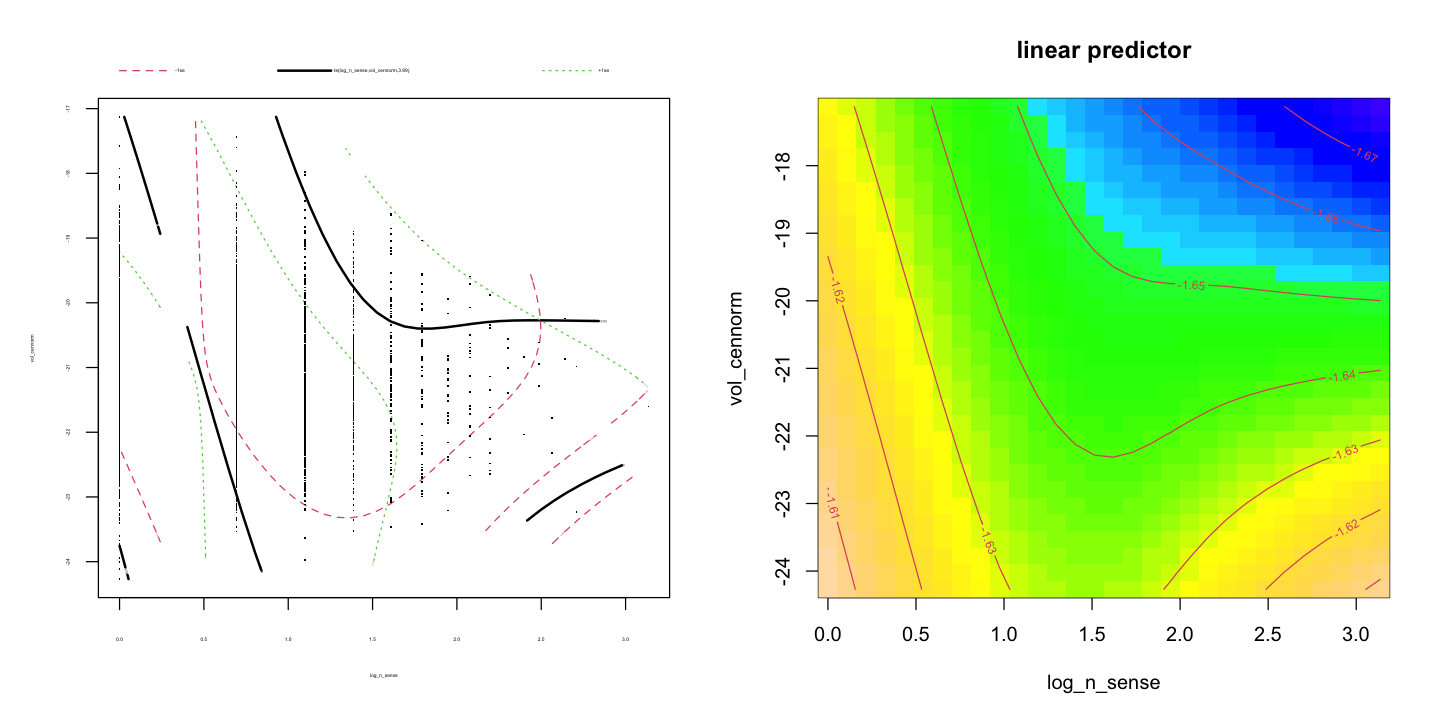

In [27]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))
plot(clp.m.2, select=2)
vis.gam(clp.m.2, view=c("log_n_sense", "vol_cennorm"), plot.type="contour", color="topo")